<a href="https://colab.research.google.com/github/leovelani/data-analysis-anime/blob/main/data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anime Dataset

Importamos o data-set através do link https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020/data.

O data-set "Anime Recommendation 2020", traz várias informações e correlaciona algumas informações entre diferentes arquivos. Para esta APS, utilizamos o arquivo ***anime.csv***, que contém informações gerais sobre 17.562 animes. As informações deste dataset, foram retiradas do site "MyAnimeList.net" (https://myanimelist.net/topanime.php)

**Bibliotecas utilizadas**

* numpy	- Operações numéricas e vetoriais
* pandas	- Manipulação e análise de dados
* matplotlib.pyplot -	Visualizações gráficas (barras, linhas, etc.)
* seaborn	- Gráficos estatísticos com estilo
* sklearn.linear_model	 - Modelo de regressão linear
* google.colab.data_table - 	Visualização de dados no ambiente do Colab
* kagglehub	- Importação de datasets do Kaggle
* os	- Manipulação de caminhos de arquivos

**Tipos de gráfico utilizados no projeto:**

* Gráfico de barras (bar plot)

* Gráfico de linhas (line plot)

* Gráfico de dispersão (scatter plot)

* Gráfico de regressão linear (regression plot)

* Mapa de calor (heatmap)

**Abordagens da APS**

* Top 10 gêneros com mais animes: Identifica os gêneros mais frequentes no dataset.

* Distribuição de notas dos animes: Mostra quantos animes são bem, medianamente ou mal avaliados.

* Relação entre popularidade e nota: Compara a qualidade dos animes com seu nível de fama.

* Regressão linear entre popularidade e nota: Avalia a tendência entre popularidade e score com uma linha de tendência.

* Correlação entre variáveis numéricas: Mede a relação entre score, membros, completados, etc.

* Quantidade de animes por faixa etária: Analisa a distribuição dos animes por classificação indicativa.

* Evolução do número de animes por estação: Mostra quantos animes foram lançados por estação ao longo dos anos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from sklearn.linear_model import LinearRegression


# Método para visualizar todas as colunas
from google.colab import data_table

# Importação da API do dataset no Kaggle
import kagglehub
import os

path = kagglehub.dataset_download("hernan4444/anime-recommendation-database-2020")

anime_csv_path = os.path.join(path, "anime.csv")

# Carregar os dados com pandas
dados = pd.read_csv(anime_csv_path)

100%|██████████| 661M/661M [00:12<00:00, 56.2MB/s]

Extracting files...


In [ ]:
#s Visualização dos dados do Dataset
generos = dados["Genres"].str.split(", ")


action = dados[dados["Genres"].apply(lambda generos: "Action" in generos)]
mecha = dados[dados["Genres"].apply(lambda generos: "Mecha" in generos)]
adventure = dados[dados["Genres"].apply(lambda generos: "Adventure" in generos)]
fantasy = dados[dados["Genres"].apply(lambda generos: "Fantasy" in generos)]
romance = dados[dados["Genres"].apply(lambda generos: "Romance" in generos)]
drama = dados[dados["Genres"].apply(lambda generos: "Drama" in generos)]
comedy = dados[dados["Genres"].apply(lambda generos: "Comedy" in generos)]
horror = dados[dados["Genres"].apply(lambda generos: "Horror" in generos)]
sci_fi = dados[dados["Genres"].apply(lambda generos: "Sci-Fi" in generos)]
mystery = dados[dados["Genres"].apply(lambda generos: "Mystery" in generos)]
sports = dados[dados["Genres"].apply(lambda generos: "Sports" in generos)]
slice_of_life = dados[dados["Genres"].apply(lambda generos: "Slice of Life" in generos)]
super_power = dados[dados["Genres"].apply(lambda generos: "Super Power" in generos)]
ecchi = dados[dados["Genres"].apply(lambda generos: "Ecchi" in generos)]
shoujo = dados[dados["Genres"].apply(lambda generos: "Shoujo" in generos)]
seinen = dados[dados["Genres"].apply(lambda generos: "Seinen" in generos)]
josei = dados[dados["Genres"].apply(lambda generos: "Josei" in generos)]
shounen = dados[dados["Genres"].apply(lambda generos: "Shounen" in generos)]
parody = dados[dados["Genres"].apply(lambda generos: "Parody" in generos)]
military = dados[dados["Genres"].apply(lambda generos: "Military" in generos)]
music = dados[dados["Genres"].apply(lambda generos: "Music" in generos)]
demons = dados[dados["Genres"].apply(lambda generos: "Demons" in generos)]
harem = dados[dados["Genres"].apply(lambda generos: "Harem" in generos)]
psychological = dados[dados["Genres"].apply(lambda generos: "Psychological" in generos)]
samurai = dados[dados["Genres"].apply(lambda generos: "Samurai" in generos)]
school = dados[dados["Genres"].apply(lambda generos: "School" in generos)]
yuri = dados[dados["Genres"].apply(lambda generos: "Yuri" in generos)]
historical = dados[dados["Genres"].apply(lambda generos: "Historical" in generos)]
supernatural = dados[dados["Genres"].apply(lambda generos: "Supernatural" in generos)]
space = dados[dados["Genres"].apply(lambda generos: "Space" in generos)]
hentai = dados[dados["Genres"].apply(lambda generos: "Hentai" in generos)]
game = dados[dados["Genres"].apply(lambda generos: "Game" in generos)]
demencia = dados[dados["Genres"].apply(lambda generos: "Dementia" in generos)]
carro = dados[dados["Genres"].apply(lambda generos: "Cars" in generos)]
artes_marciais = dados[dados["Genres"].apply(lambda generos: "Martial Arts" in generos)]
magica = dados[dados["Genres"].apply(lambda generos: "Magic" in generos)]
kids = dados[dados["Genres"].apply(lambda generos: "Kids" in generos)]
policia = dados[dados["Genres"].apply(lambda generos: "Police" in generos)]
shoujo_ai = dados[dados["Genres"].apply(lambda generos: "Shoujo Ai" in generos)]
shounen_ai = dados[dados["Genres"].apply(lambda generos: "Shounen Ai" in generos)]
thriller = dados[dados["Genres"].apply(lambda generos: "Thriller" in generos)]
vampiro = dados[dados["Genres"].apply(lambda generos: "Vampire" in generos)]
yaoi = dados[dados["Genres"].apply(lambda generos: "Yaoi" in generos)]
desconhecido = dados[dados["Genres"].apply(lambda generos: "Unknown" in generos)]


# Garante que a coluna "Genres" é uma lista de gêneros por linha
dados["Genres"] = dados["Genres"].dropna().astype(str).str.split(", ")
data_table.DataTable(shoujo, include_index=False, num_rows_per_page=5, max_columns=35)


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
32,51,Tenshi Kinryouku,6.31,"Action, Drama, Romance, Shoujo, Supernatural",Angel Sanctuary,天使禁猟区,OVA,3,"May 25, 2000 to Aug 25, 2000",Unknown,...,1464.0,2043.0,3490.0,5450.0,5008.0,3621.0,2115.0,992.0,689.0,415.0
42,61,D.N.Angel,7.2,"Action, Comedy, Magic, Romance, Fantasy, Schoo...",D.N.Angel,Ｄ・Ｎ・ＡＮＧＥＬ,TV,26,"Apr 3, 2003 to Sep 25, 2003",Spring 2003,...,7515.0,11105.0,19858.0,25101.0,15032.0,8167.0,3203.0,1092.0,595.0,378.0
54,74,Gakuen Alice,7.65,"Comedy, School, Shoujo, Super Power",Gakuen Alice,学園アリス,TV,26,"Oct 30, 2004 to May 14, 2005",Fall 2004,...,5560.0,7151.0,11074.0,11158.0,5331.0,2357.0,618.0,214.0,115.0,104.0
77,98,Mai-HiME,7.46,"Action, Comedy, Drama, Fantasy, Magic, Mecha, ...",My-Hime,舞-HiME,TV,26,"Sep 30, 2004 to Mar 31, 2005",Fall 2004,...,4076.0,7287.0,12622.0,12897.0,6091.0,3053.0,1129.0,391.0,211.0,191.0
79,100,Shin Shirayuki-hime Densetsu Prétear,7.2,"Comedy, Drama, Fantasy, Magic, Romance, Shoujo...",Prétear:The New Legend of Snow White,新白雪姫伝説プリーティア,TV,13,"Apr 4, 2001 to Jun 27, 2001",Spring 2001,...,2198.0,3135.0,5368.0,7030.0,4152.0,2306.0,783.0,270.0,127.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,44141,Watashi ni Tenshi ga Maiorita! (Anime Shin Pro...,Unknown,"Slice of Life, Comedy, Shoujo Ai",Unknown,私に天使が舞い降りた! (アニメ新プロジェクト),Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17357,44191,Tropical-Rouge! Precure,Unknown,"Action, Magic, Fantasy, Shoujo",TROPICAL-ROUGE! PRETTY CURE,トロピカル～ジュ！プリキュア,TV,Unknown,"Feb 28, 2021 to ?",Winter 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17380,44376,Idol Land PriPara,Unknown,"Music, Slice of Life, Kids, Shoujo",Unknown,アイドルランドプリパラ,ONA,Unknown,"Jul, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17474,46422,Niehime to Kemono no Ou,Unknown,"Romance, Fantasy, Shoujo",Unknown,贄姫と獣の王,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


**Features do Data-set**
```
N,Colunas
1,MAL_ID: MyAnimelist ID of the anime. (e.g. 1)
2,Name: full name of the anime. (e.g. Cowboy Bebop)
3,Score: average score of the anime given from all users in MyAnimelist database. (e.g. 8.78)
4,"Genres: comma separated list of genres for this anime. (e.g. Action, Adventure, Comedy, Drama, Sci-Fi, Space)"
5,English name: full name in english of the anime. (e.g. Cowboy Bebop)
6,Japanese name: full name in japanses of the anime. (e.g. カウボーイビバップ)
7,"Type: TV, movie, OVA, etc. (e.g. TV)"
8,Episodes': number of chapters. (e.g. 26)
9,"Aired: broadcast date. (e.g. Apr 3, 1998 to Apr 24, 1999)"
10,Premiered: season premiere. (e.g. Spring 1998)
11,Producers: comma separated list of produducers (e.g. Bandai Visual)
12,"Licensors: comma separated list of licensors (e.g. Funimation, Bandai Entertainment)"
13,Studios: comma separated list of studios (e.g. Sunrise)
14,"Source: Manga, Light novel, Book, etc. (e.g Original)"
15,Duration: duration of the anime per episode (e.g 24 min. per ep.)
16,Rating: age rate (e.g. R - 17+ (violence & profanity))
17,Ranked: position based in the score. (e.g 28)
18,Popularity: position based in the the number of users who have added the anime to their list. (e.g 39)
19,"Members: number of community members that are in this anime's ""group"". (e.g. 1251960)"
20,"Favorites: number of users who have the anime as ""favorites"". (e.g. 61,971)"
21,Watching: number of users who are watching the anime. (e.g. 105808)
22,Completed: number of users who have complete the anime. (e.g. 718161)
23,On-Hold: number of users who have the anime on Hold. (e.g. 71513)
24,Dropped: number of users who have dropped the anime. (e.g. 26678)
25,Plan to Watch': number of users who plan to watch the anime. (e.g. 329800)
26,Score-10': number of users who scored 10. (e.g. 229170)
27,Score-9': number of users who scored 9. (e.g. 182126)
28,Score-8': number of users who scored 8. (e.g. 131625)
29,Score-7': number of users who scored 7. (e.g. 62330)
30,Score-6': number of users who scored 6. (e.g. 20688)
31,Score-5': number of users who scored 5. (e.g. 8904)
32,Score-4': number of users who scored 4. (e.g. 3184)
33,Score-3': number of users who scored 3. (e.g. 1357)
34,Score-2': number of users who scored 2. (e.g. 741)
35,Score-1': number of users who scored 1. (e.g. 1580)
```



`Quais são os genêros mais populares ?`



<Figure size 1000x600 with 0 Axes>

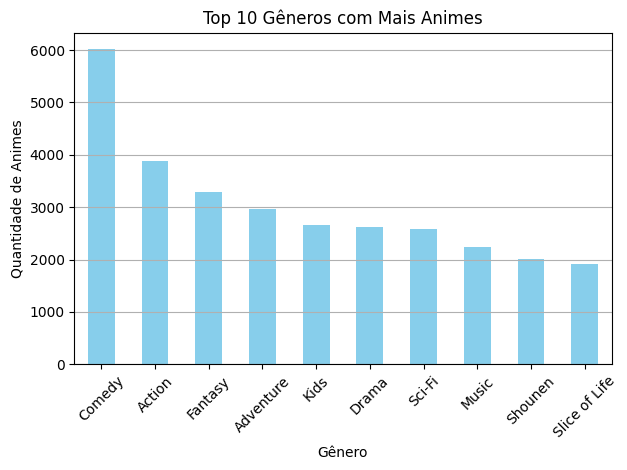

In [ ]:
# Garante que os gêneros estejam limpos e separados corretamente
dados["Genres"] = dados["Genres"].dropna().astype(str)

# Remove colchetes e aspas extras
dados["Genres"] = dados["Genres"].str.replace(r"[\[\]']", "", regex=True)

# Divide os gêneros em listas
dados["Genres"] = dados["Genres"].str.split(", ")

# Conta cada gênero individualmente
contagem_generos = {}

for lista in dados["Genres"]:
    for genero in lista:
        if genero not in contagem_generos:
            contagem_generos[genero] = 1
        else:
            contagem_generos[genero] += 1

# Transforma em DataFrame e plota
df_generos = pd.DataFrame.from_dict(contagem_generos, orient="index", columns=["Quantidade"])
df_generos = df_generos.sort_values("Quantidade", ascending=False)

# Gráfico corrigido
plt.figure(figsize=(10, 6))
df_generos.head(10).plot(kind="bar", legend=False, color="skyblue")
plt.title("Top 10 Gêneros com Mais Animes")
plt.ylabel("Quantidade de Animes")
plt.xlabel("Gênero")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-4-19d085753a83>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_generos.head(10).index, y=df_generos.head(10)["Quantidade"], palette="coolwarm")


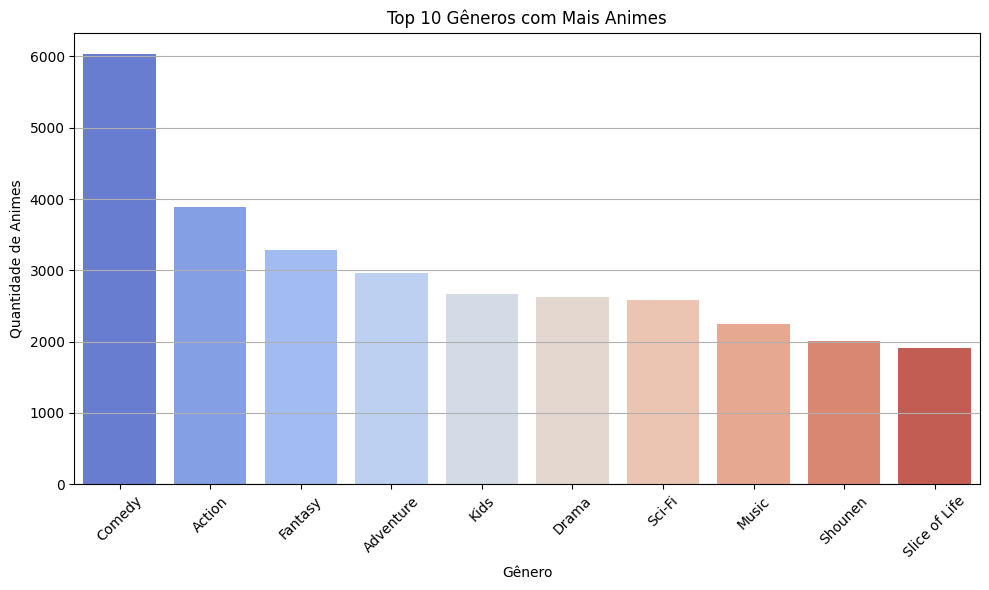

In [ ]:
# Garante que os gêneros estejam limpos e separados corretamente
dados["Genres"] = dados["Genres"].dropna().astype(str)

# Remove colchetes e aspas extras
dados["Genres"] = dados["Genres"].str.replace(r"[\[\]']", "", regex=True)

# Divide os gêneros em listas
dados["Genres"] = dados["Genres"].str.split(", ")

# Conta cada gênero individualmente
contagem_generos = {}

for lista in dados["Genres"]:
    for genero in lista:
        contagem_generos[genero] = contagem_generos.get(genero, 0) + 1

# Transforma em DataFrame e organiza
df_generos = pd.DataFrame.from_dict(contagem_generos, orient="index", columns=["Quantidade"])
df_generos = df_generos.sort_values("Quantidade", ascending=False)

# Plotando com seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=df_generos.head(10).index, y=df_generos.head(10)["Quantidade"], palette="coolwarm")

plt.title("Top 10 Gêneros com Mais Animes")
plt.ylabel("Quantidade de Animes")
plt.xlabel("Gênero")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Distribuição de notas dos animes:
Ruins: 3341 animes (19.02%)
Medianos: 5300 animes (30.18%)
Bons: 3780 animes (21.52%)
Desconhecidos: 5141 animes (29.27%)


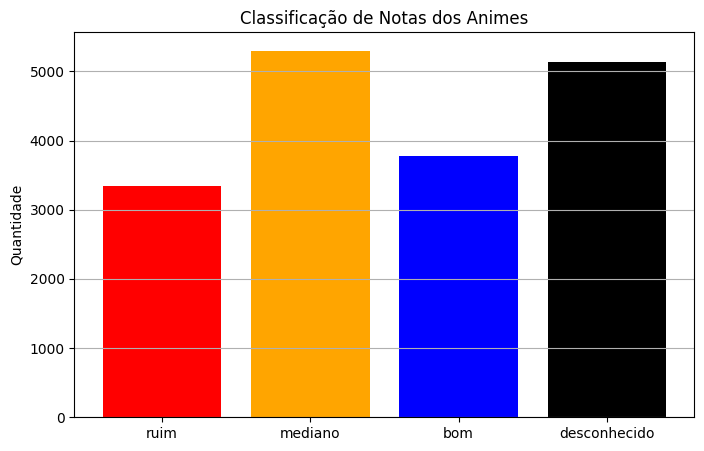

In [ ]:
# Quantidade de animes que possuem uma nota boa, ruim ou desconhecido
# Filtra e trata a coluna Score
dados_filtrados = dados[dados["Score"] != "Unknown"].copy()
dados_filtrados["Score"] = pd.to_numeric(dados_filtrados["Score"], errors="coerce")

# Classificações
ruim = dados_filtrados[dados_filtrados["Score"] < 6.0]
mediano = dados_filtrados[(dados_filtrados["Score"] >= 6.0) & (dados_filtrados["Score"] < 7.0)]
bom = dados_filtrados[dados_filtrados["Score"] >= 7.0]
desconhecido = dados[dados["Score"] == "Unknown"]

# Contagens
bar_labels = ["ruim", "mediano", "bom", "desconhecido"]
bar_values = [len(ruim), len(mediano), len(bom), len(desconhecido)]

# Impressão dos resultados dos dados
total_animes = sum(bar_values)
print("Distribuição de notas dos animes:")
print(f"Ruins: {len(ruim)} animes ({(len(ruim)/total_animes)*100:.2f}%)")
print(f"Medianos: {len(mediano)} animes ({(len(mediano)/total_animes)*100:.2f}%)")
print(f"Bons: {len(bom)} animes ({(len(bom)/total_animes)*100:.2f}%)")
print(f"Desconhecidos: {len(desconhecido)} animes ({(len(desconhecido)/total_animes)*100:.2f}%)")

# Gráfico
plt.figure(figsize=(8,5))
plt.bar(bar_labels, bar_values, color=["red", "orange", "blue", "black"])
plt.title("Classificação de Notas dos Animes")
plt.ylabel("Quantidade")
plt.grid(axis="y")
plt.show()


Distribuição de notas dos animes:
Ruins: 3341 animes (19.02%)
Medianos: 5300 animes (30.18%)
Bons: 3780 animes (21.52%)
Desconhecidos: 5141 animes (29.27%)


<ipython-input-6-45b8431cbf94>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bar_labels, y=bar_values, palette=["#e74c3c", "#f39c12", "#3498db", "#2c3e50"])


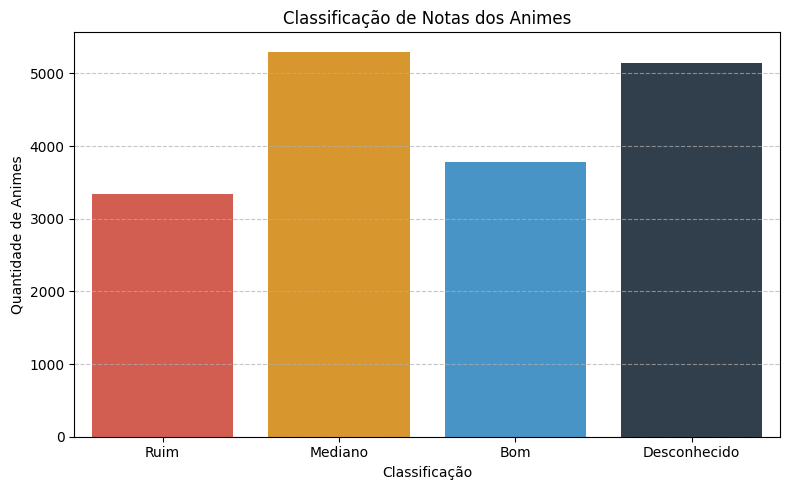

In [ ]:
# Filtra e trata a coluna Score
dados_filtrados = dados[dados["Score"] != "Unknown"].copy()
dados_filtrados["Score"] = pd.to_numeric(dados_filtrados["Score"], errors="coerce")

# Classificações
ruim = dados_filtrados[dados_filtrados["Score"] < 6.0]
mediano = dados_filtrados[(dados_filtrados["Score"] >= 6.0) & (dados_filtrados["Score"] < 7.0)]
bom = dados_filtrados[dados_filtrados["Score"] >= 7.0]
desconhecido = dados[dados["Score"] == "Unknown"]

# Contagens
bar_labels = ["Ruim", "Mediano", "Bom", "Desconhecido"]
bar_values = [len(ruim), len(mediano), len(bom), len(desconhecido)]

# Impressão dos resultados dos dados
total_animes = sum(bar_values)
print("Distribuição de notas dos animes:")
print(f"Ruins: {len(ruim)} animes ({(len(ruim)/total_animes)*100:.2f}%)")
print(f"Medianos: {len(mediano)} animes ({(len(mediano)/total_animes)*100:.2f}%)")
print(f"Bons: {len(bom)} animes ({(len(bom)/total_animes)*100:.2f}%)")
print(f"Desconhecidos: {len(desconhecido)} animes ({(len(desconhecido)/total_animes)*100:.2f}%)")

# Gráfico com seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=bar_labels, y=bar_values, palette=["#e74c3c", "#f39c12", "#3498db", "#2c3e50"])

plt.title("Classificação de Notas dos Animes")
plt.ylabel("Quantidade de Animes")
plt.xlabel("Classificação")
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Mediana da popularidade: 6347.0
nota boa e popular: 3380 animes
nota boa não popular: 400 animes
nota ruim e popular: 438 animes
nota ruim e não popular: 2903 animes


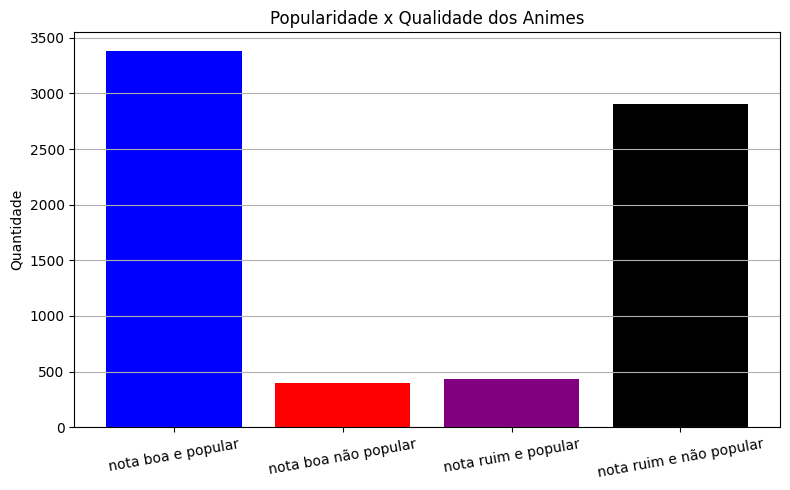

In [ ]:
# Validação que Popularity seja numérica
dados_filtrados["Popularity"] = pd.to_numeric(dados_filtrados["Popularity"], errors="coerce")

# Cálculo da mediana de popularidade
limite_popularidade = dados_filtrados["Popularity"].median()
print(f"Mediana da popularidade: {limite_popularidade}")

# Classificação dos animes por qualidade e popularidade
good_score_popular = bom[bom["Popularity"] <= limite_popularidade]
good_score_not_popular = bom[bom["Popularity"] > limite_popularidade]
bad_score_popular = ruim[ruim["Popularity"] <= limite_popularidade]
bad_score_not_popular = ruim[ruim["Popularity"] > limite_popularidade]

# Labels (nome dos grupos) e valores (quantidade dos animes)
labels = [
    "nota boa e popular",
    "nota boa não popular",
    "nota ruim e popular",
    "nota ruim e não popular"
]
values = [
    len(good_score_popular),
    len(good_score_not_popular),
    len(bad_score_popular),
    len(bad_score_not_popular)
]

# Resultado dos dados
for label, val in zip(labels, values):
    print(f"{label}: {val} animes")

# Visualização dos dados
plt.figure(figsize=(8,5))
plt.bar(labels, values, color=["blue", "red", "purple", "black"])
plt.title("Popularidade x Qualidade dos Animes")
plt.ylabel("Quantidade")
plt.xticks(rotation=10)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


Mediana da popularidade: 6347.0
nota boa e popular: 3380 animes
nota boa não popular: 400 animes
nota ruim e popular: 438 animes
nota ruim e não popular: 2903 animes


<ipython-input-8-d8bdd6036f4b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico_df, x='Grupo', y='Quantidade', palette=["blue", "red", "purple", "black"])


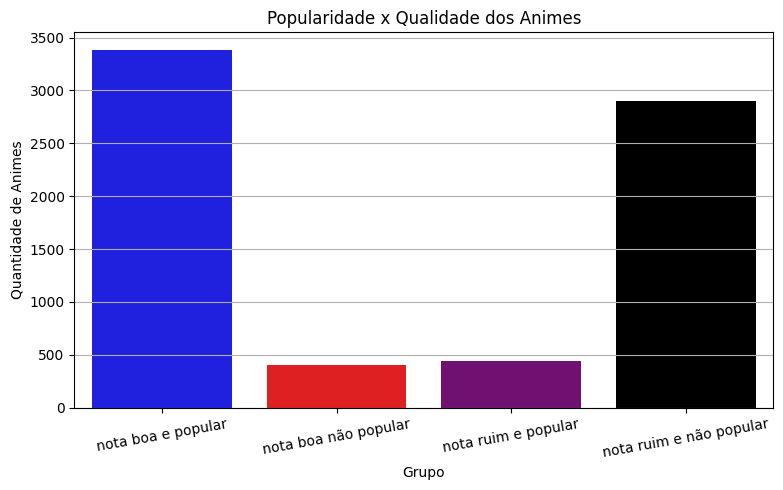

In [ ]:
# Validação que Popularity seja numérica
dados_filtrados["Popularity"] = pd.to_numeric(dados_filtrados["Popularity"], errors="coerce")

# Cálculo da mediana de popularidade
limite_popularidade = dados_filtrados["Popularity"].median()
print(f"Mediana da popularidade: {limite_popularidade}")

# Classificação dos animes por qualidade e popularidade
good_score_popular = bom[bom["Popularity"] <= limite_popularidade]
good_score_not_popular = bom[bom["Popularity"] > limite_popularidade]
bad_score_popular = ruim[ruim["Popularity"] <= limite_popularidade]
bad_score_not_popular = ruim[ruim["Popularity"] > limite_popularidade]

# Labels e Valores
labels = [
    "nota boa e popular",
    "nota boa não popular",
    "nota ruim e popular",
    "nota ruim e não popular"
]

values = [
    len(good_score_popular),
    len(good_score_not_popular),
    len(bad_score_popular),
    len(bad_score_not_popular)
]

# Resultado dos dados
for label, val in zip(labels, values):
    print(f"{label}: {val} animes")

# Criação do DataFrame para o gráfico
grafico_df = pd.DataFrame({
    'Grupo': labels,
    'Quantidade': values
})

# Visualização usando Seaborn
plt.figure(figsize=(8,5))
sns.barplot(data=grafico_df, x='Grupo', y='Quantidade', palette=["blue", "red", "purple", "black"])
plt.title("Popularidade x Qualidade dos Animes")
plt.ylabel("Quantidade de Animes")
plt.xticks(rotation=10)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


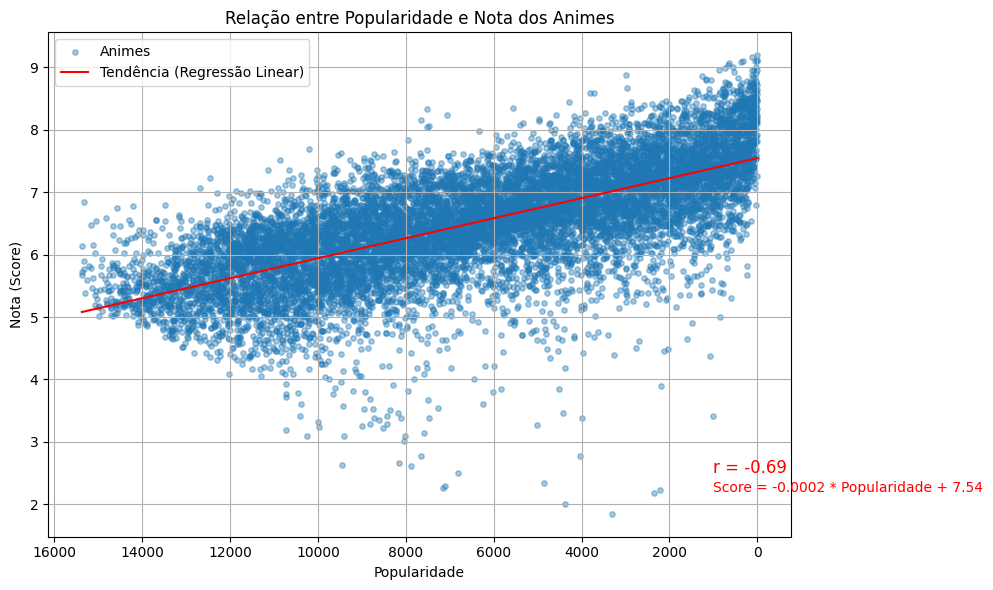

In [ ]:
# Remove entradas com Score e Popularity desconhecidos e converte para valores numéricos
dados_filtrados = dados[dados["Score"] != "Unknown"].copy()
dados_filtrados["Score"] = pd.to_numeric(dados_filtrados["Score"], errors="coerce")
dados_filtrados["Popularity"] = pd.to_numeric(dados_filtrados["Popularity"], errors="coerce")

# Remove registros com valores ausentes
df_modelo = dados_filtrados.dropna(subset=["Score", "Popularity"])

# Cálculo da regressão linear
X = df_modelo["Popularity"].values.reshape(-1, 1)
y = df_modelo["Score"].values

modelo = LinearRegression()
modelo.fit(X, y)

# Exibe a equação da reta de regressão
coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Cálculo da correlação
correlacao = df_modelo[["Score", "Popularity"]].corr().iloc[0, 1]

# Geração dos pontos previstos da regressão
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = modelo.predict(x_range)

# Gráfico
plt.figure(figsize=(10, 6))

# Scatter Plot
plt.scatter(df_modelo["Popularity"], df_modelo["Score"], alpha=0.4, s=15, label='Animes')

# Linha de Regressão
plt.plot(x_range, y_pred, color='red', label='Tendência (Regressão Linear)')

# Adiciona informações no gráfico
plt.text(1000, 2.5, f"r = {correlacao:.2f}", fontsize=12, color="red")
plt.text(1000, 2.2, f"Score = {coeficiente:.4f} * Popularidade + {intercepto:.2f}", fontsize=10, color="red")

# Ajustes visuais
plt.xlabel("Popularidade")
plt.ylabel("Nota (Score)")
plt.title("Relação entre Popularidade e Nota dos Animes")
plt.gca().invert_xaxis()  # Quanto menor a popularidade, mais famoso
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

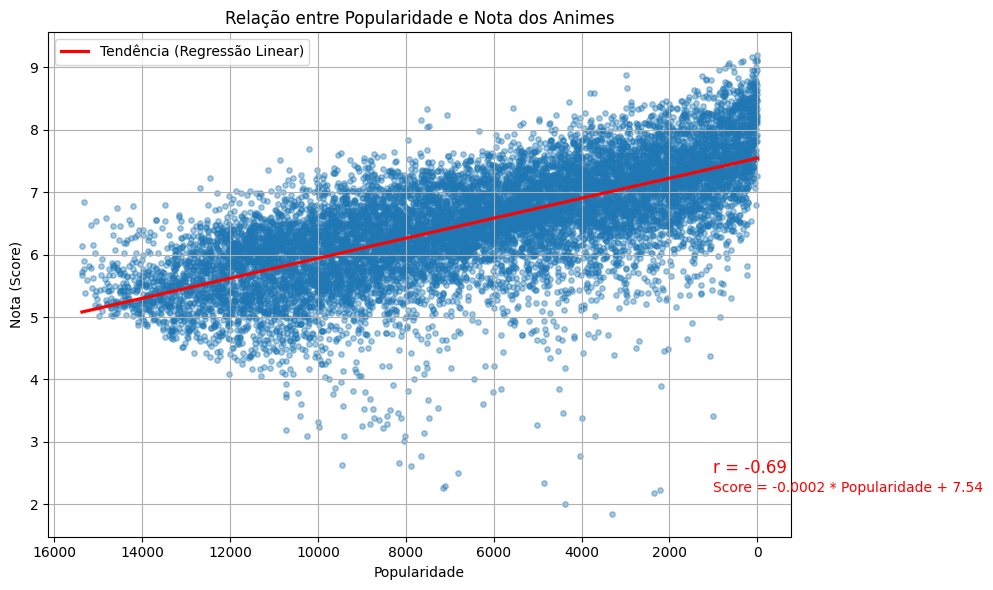

In [ ]:
# Remove entradas com Score e Popularity desconhecidos e converte para valores numéricos
dados_filtrados = dados[dados["Score"] != "Unknown"].copy()
dados_filtrados["Score"] = pd.to_numeric(dados_filtrados["Score"], errors="coerce")
dados_filtrados["Popularity"] = pd.to_numeric(dados_filtrados["Popularity"], errors="coerce")

# Remove registros com valores ausentes
df_modelo = dados_filtrados.dropna(subset=["Score", "Popularity"])

# Cálculo da regressão linear
X = df_modelo["Popularity"].values.reshape(-1, 1)
y = df_modelo["Score"].values

modelo = LinearRegression()
modelo.fit(X, y)

# Exibe a equação da reta de regressão
coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Cálculo da correlação
correlacao = df_modelo[["Score", "Popularity"]].corr().iloc[0, 1]

# Geração do gráfico com linha de tendência
plt.figure(figsize=(10, 6))

sns.regplot(
    x="Popularity",
    y="Score",
    data=df_modelo,
    scatter_kws={"alpha": 0.4, "s": 15},
    line_kws={"color": "red", "label": "Tendência (Regressão Linear)"}
)

# Adiciona informações no gráfico
plt.text(1000, 2.5, f"r = {correlacao:.2f}", fontsize=12, color="red")
plt.text(1000, 2.2, f"Score = {coeficiente:.4f} * Popularidade + {intercepto:.2f}", fontsize=10, color="red")

# Ajustes visuais
plt.xlabel("Popularidade")
plt.ylabel("Nota (Score)")
plt.title("Relação entre Popularidade e Nota dos Animes")
plt.gca().invert_xaxis()  # Quanto menor a popularidade, mais famoso
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


`Comparação entre os dois gráficos`

Embora as duas visualizações apresentem abordagens diferentes — uma categórica e outra contínua —, ambas exploram a relação entre nota e popularidade.
O gráfico de barras  

*   Gráfico de Barras - categoriza os dados e mostra a distribuição entre os grupos definidos por score e mediana de popularidade
*   Gráfico de Dispersão - revela uma tendência positiva entre as variáveis, confirmando que animes populares tendem a ser bem avaliados

`Resultado da correlação`
* Coeficiente = *-0.0002*: indica quanto mais popular, maior tende a ser o Score.
* A correlação de -0.69 entre Score e Popularity é forte e negativa, ou seja:

  * Quando a popularidade aumenta (número de ranking diminui, como ir de 5000 para 100), a nota tende a subir.

  * Popularidade mais baixa → nota mais alta.

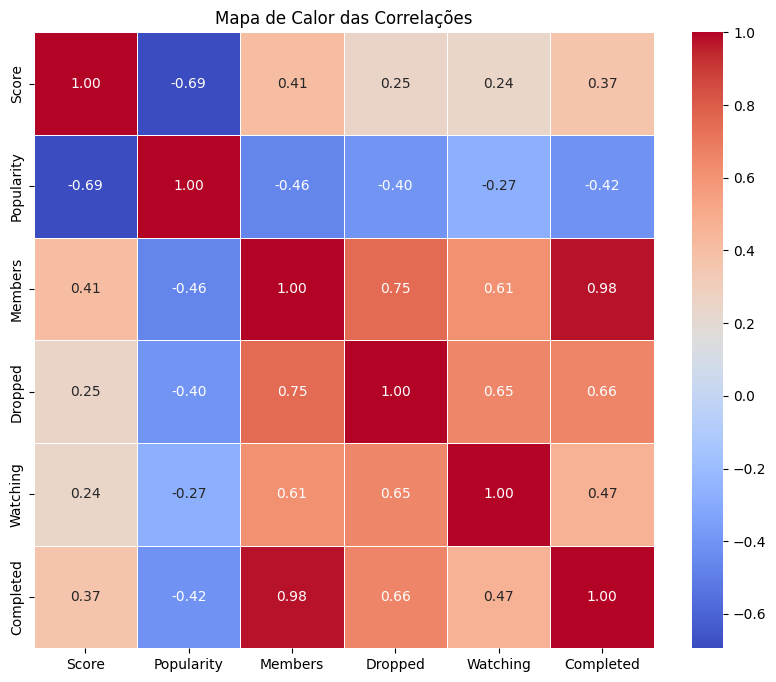

In [ ]:
# Pega só colunas numéricas relevantes
colunas_numericas = ["Score", "Popularity", "Members", "Dropped", "Watching", "Completed"]
dados_numericos = dados_filtrados[colunas_numericas]

# Calcula a correlação
correlacoes = dados_numericos.corr()

# Cria o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor das Correlações")
plt.show()


`Legenda do Heatmap`

*   +1.00: correlação positiva perfeita
*   -1.00: correlação negativa perfeita
*   0.00: nenhuma correlação

`Insights`

* Score x Popularity - Animes com melhor score tendem a ser mais populares (quanto menor o número, mais famoso).

* Animes com muitos membros são geralmente mais completos, assistidos até o fim — e também os mais dropados.

* A quantidade de membros é a variável mais conectada a todas as outras, mostrando que ela pode ser um ótimo indicativo de engajamento.

* A nota (Score) não tem correlação forte com o anime ser assistido até o final, dropado ou estar sendo assistido. Isso mostra que nota não é o único fator que define o sucesso de um anime.

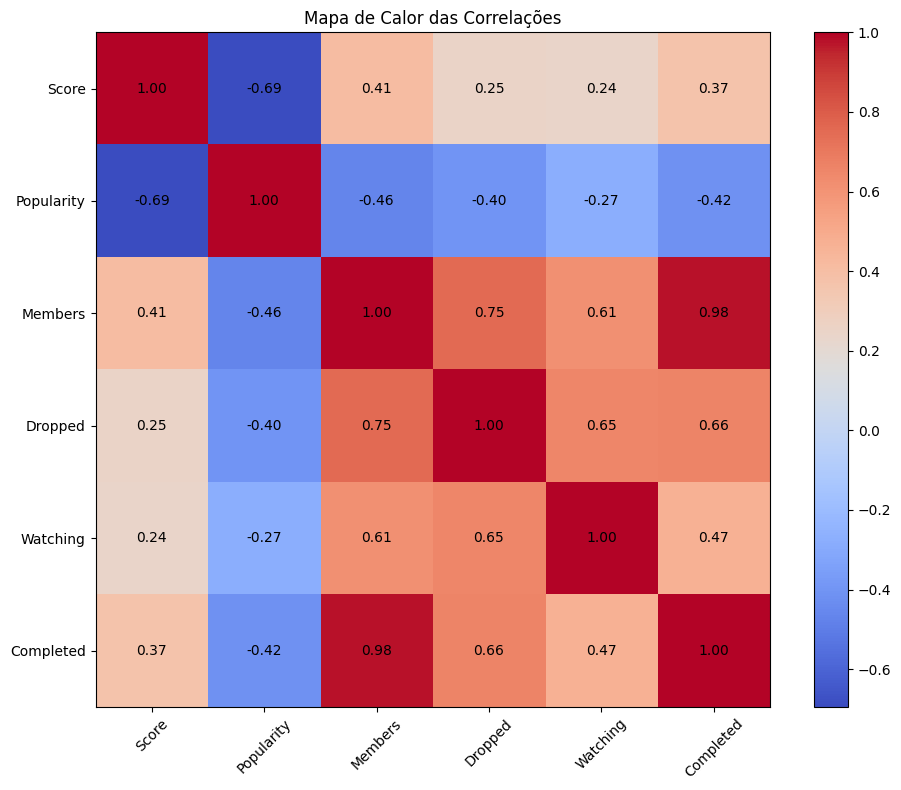

In [ ]:
# Pega só colunas numéricas relevantes
colunas_numericas = ["Score", "Popularity", "Members", "Dropped", "Watching", "Completed"]
dados_numericos = dados_filtrados[colunas_numericas]

# Calcula a correlação
correlacoes = dados_numericos.corr()

# Cria o heatmap
plt.figure(figsize=(10, 8))

# Cria a imagem do heatmap
plt.imshow(correlacoes, cmap='coolwarm', interpolation='nearest')

# Adiciona os valores dentro dos quadrados
for i in range(len(correlacoes)):
    for j in range(len(correlacoes.columns)):
        plt.text(j, i, f'{correlacoes.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

# Configura os ticks
plt.xticks(np.arange(len(correlacoes.columns)), correlacoes.columns, rotation=45)
plt.yticks(np.arange(len(correlacoes.columns)), correlacoes.columns)

plt.colorbar()  # Barra lateral de cores
plt.title("Mapa de Calor das Correlações")
plt.tight_layout()
plt.show()

<BarContainer object of 6 artists>

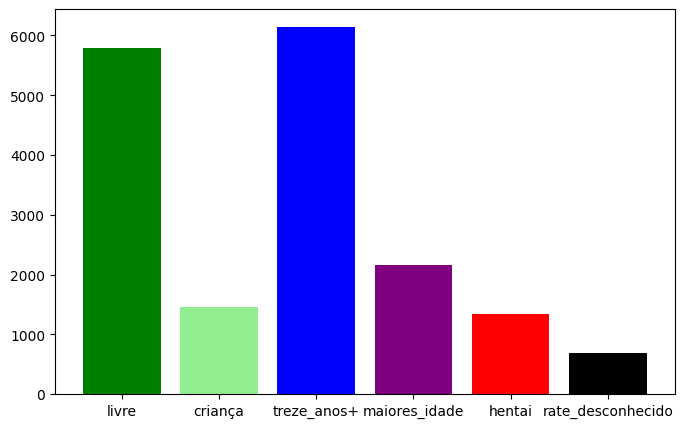

In [ ]:
#restriçao de idade
treze = dados.loc[dados['Rating'] == "PG-13 - Teens 13 or older"]

livre = dados.loc[dados['Rating'] == "G - All Ages"]
livre2 = dados.loc[dados['Rating'] == "G-All Ages"]

maiores_idade = dados.loc[dados['Rating'] == "R+ - Mild Nudity"]
maiores_idade2 = dados.loc[dados['Rating'] == "R - 17+ (violence & profanity)"]

criança = dados.loc[dados['Rating'] == "PG - Children"]

hentai = dados.loc[dados['Rating'] == "Rx - Hentai"]

rate_desconhecido = dados.loc[dados['Rating'] == "Unknown"]

#criando o grafico
label = ["livre","criança","treze_anos+","maiores_idade","hentai","rate_desconhecido"]

value = [len(livre) + len(livre2),len(criança),len(treze),len(maiores_idade) + len(maiores_idade2),len(hentai),len(rate_desconhecido)]

plt.figure(figsize=(8,5))

plt.bar(label,value, color = ["green","lightgreen","blue","purple","red","black"])

<ipython-input-14-2d9b6a2b5618>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_rating, x='Rating', y='Total', palette=["green","lightgreen","blue","purple","red","black"])


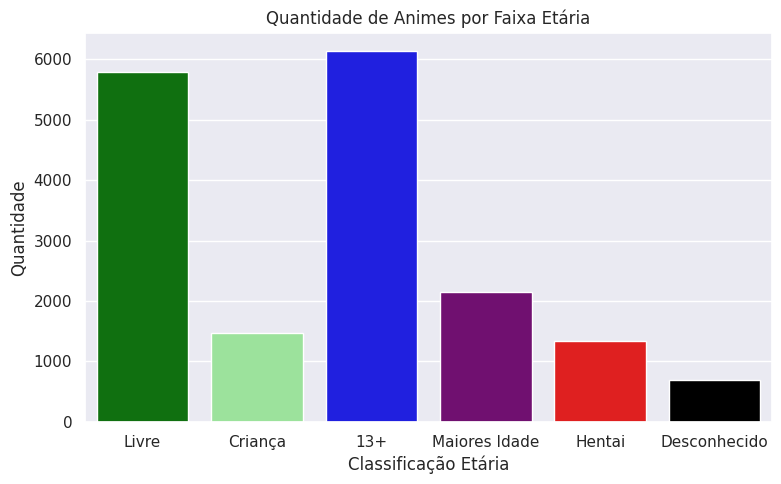

In [ ]:
# Contagem dos Ratings agrupados
labels = ["Livre", "Criança", "13+", "Maiores Idade", "Hentai", "Desconhecido"]
valores = [
    len(dados[dados['Rating'].isin(["G - All Ages", "G-All Ages"])]),
    len(dados[dados['Rating'] == "PG - Children"]),
    len(dados[dados['Rating'] == "PG-13 - Teens 13 or older"]),
    len(dados[dados['Rating'].isin(["R+ - Mild Nudity", "R - 17+ (violence & profanity)"])]),
    len(dados[dados['Rating'] == "Rx - Hentai"]),
    len(dados[dados['Rating'] == "Unknown"])
]

# Criar dataframe
df_rating = pd.DataFrame({
    'Rating': labels,
    'Total': valores
})

# Estilo do seaborn
sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 5))

# Criação do gráfico de barras com Seaborn
sns.barplot(data=df_rating, x='Rating', y='Total', palette=["green","lightgreen","blue","purple","red","black"])

plt.title('Quantidade de Animes por Faixa Etária')
plt.xlabel('Classificação Etária')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

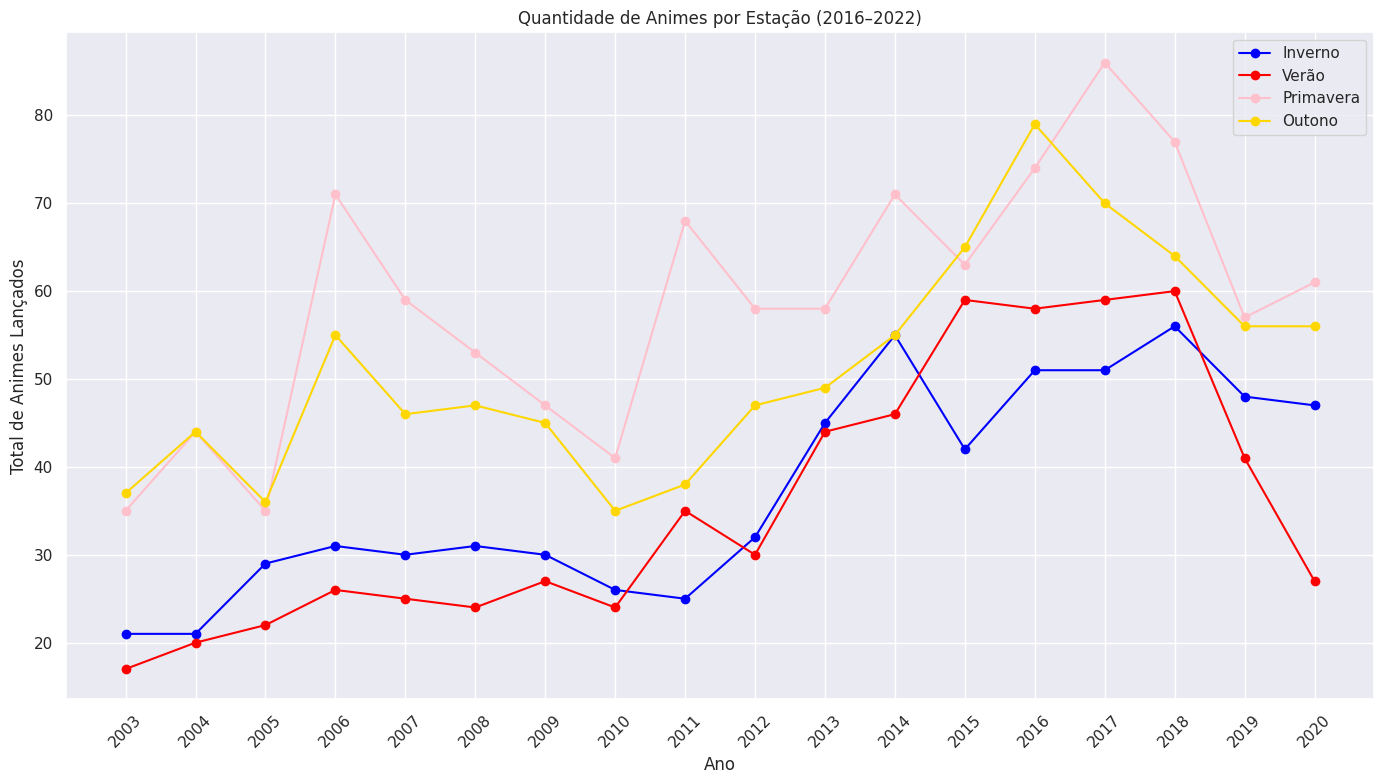

In [ ]:
# Intervalo de anos para o eixo X
ano_init = 2003
ano_fim = 2021
anos = list(range(ano_init, ano_fim))

# Listas para guardar os totais por estação
primavera_total = []
verao_total = []
outono_total = []
inverno_total = []

# Preenche as listas com a contagem de animes por estação
for ano in anos:
    primavera_total.append(len(dados[dados["Premiered"] == f"Spring {ano}"]))
    verao_total.append(len(dados[dados["Premiered"] == f"Summer {ano}"]))
    outono_total.append(len(dados[dados["Premiered"] == f"Fall {ano}"]))
    inverno_total.append(len(dados[dados["Premiered"] == f"Winter {ano}"]))

# Plotagem com 4 linhas
plt.figure(figsize=(14, 8))
plt.plot(anos, inverno_total, label="Inverno", color="blue", marker="o")
plt.plot(anos, verao_total, label="Verão", color="red", marker="o")
plt.plot(anos, primavera_total, label="Primavera", color="pink", marker="o")
plt.plot(anos, outono_total, label="Outono", color="gold", marker="o")

plt.title("Quantidade de Animes por Estação (2016–2022)")
plt.xlabel("Ano")
plt.ylabel("Total de Animes Lançados")
plt.xticks(anos, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


`Porque houve o crescimento a partir de 2010 ?`

Devido aos novos serviços de streaming.


`Porque houve uma baixa a partir em 2019 ?`

Devido ao COVID, muitos animes foram adiados e teve um impacto siginno número de animes

https://www.crunchyroll.com/pt-br/news/latest/2018/11/16/venda-de-animes-em-blu-ray-esto-em-queda-livre-no-japo-produtores-chegam-a-cancelar-lanamentos-em-mdia-fsica?srsltid=AfmBOooO7QRLOmUpLv5i97u7XcbOG7Eq3t_u-5XIW0optaBW13m4JNJf

https://www.youtube.com/watch?v=pA7fMTbHxUg&t=12s


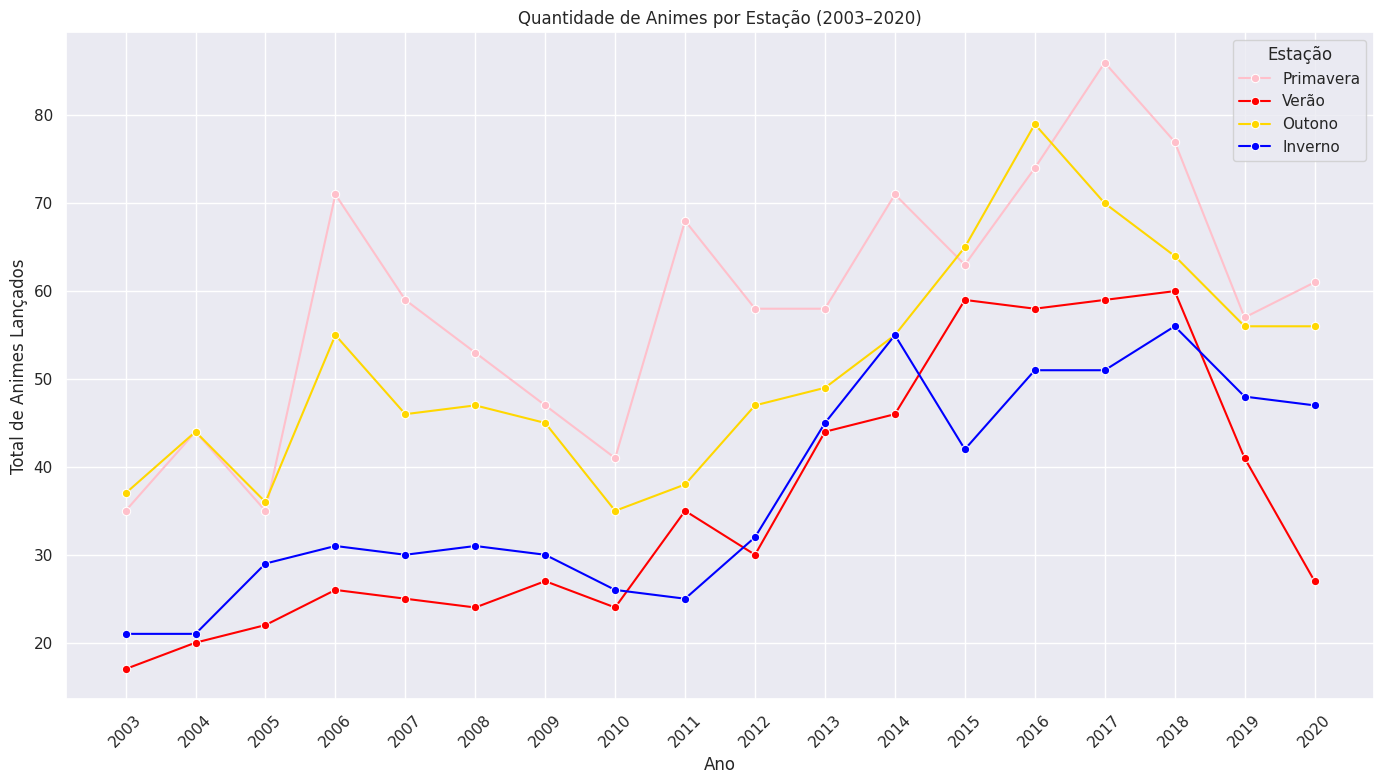

In [ ]:
# Intervalo de anos para o eixo X
ano_init = 2003
ano_fim = 2021
anos = list(range(ano_init, ano_fim))

# Preenche uma lista de dicionários com os dados de cada estação
dados_plot = []

for ano in anos:
    dados_plot.append({'Ano': ano, 'Estação': 'Primavera', 'Total': len(dados[dados["Premiered"] == f"Spring {ano}"])})
    dados_plot.append({'Ano': ano, 'Estação': 'Verão', 'Total': len(dados[dados["Premiered"] == f"Summer {ano}"])})
    dados_plot.append({'Ano': ano, 'Estação': 'Outono', 'Total': len(dados[dados["Premiered"] == f"Fall {ano}"])})
    dados_plot.append({'Ano': ano, 'Estação': 'Inverno', 'Total': len(dados[dados["Premiered"] == f"Winter {ano}"])})

# Cria um DataFrame para facilitar o plot
df_plot = pd.DataFrame(dados_plot)

# Estilo do seaborn
sns.set_theme(style="darkgrid")

plt.figure(figsize=(14, 8))

# Criação do gráfico com Seaborn
sns.lineplot(data=df_plot, x="Ano", y="Total", hue="Estação", marker="o", palette=["pink", "red", "gold", "blue"])

plt.title("Quantidade de Animes por Estação (2003–2020)")
plt.xticks(anos, rotation=45)
plt.xlabel("Ano")
plt.ylabel("Total de Animes Lançados")
plt.tight_layout()
plt.show()

In [ ]:
!jupyter nbconvert --to html /content/APS_1_Dataset_MAL.ipynb

[NbConvertApp] Converting notebook /content/APS_1_Dataset_MAL.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 1853175 bytes to /content/APS_1_Dataset_MAL.html
